<h3 style="text-align:center; background-color:black; color:white; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; padding: 1rem 0;">Importing Libraries</h3>

In [2]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

<h3 style="text-align:center; background-color:black; color:white; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; padding: 1rem 0;">Importing & Processing Dataset</h3>

In [3]:
df_train = pd.read_csv('./dataset/train.csv')
df_Val = pd.read_csv('./dataset/val.csv')
df_test = pd.read_csv('./dataset/test.csv')

In [4]:
df = pd.concat([df_train, df_Val, df_test], ignore_index=True)
df.reset_index(drop=True, inplace=True)

<h3 style="text-align:center; background-color:black; color:white; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; padding: 1rem 0;">Data Statistics</h3>

In [5]:
df.head(1)

,text
0,Mr. Justice Teare : \n\tThis is another disput...


In [6]:
total_docs = len(df)
print(f'Total number of documents: {total_docs}')

Total number of documents: 151743


In [7]:
df['total_tokens'] = df['text'].progress_apply(lambda x: len(x.split()))
total_tokens = df['total_tokens'].sum()
mean_tokens = df['total_tokens'].mean()

  0%|          | 0/151743 [00:00<?, ?it/s]

In [8]:
print(f'Total number of tokens: {total_tokens}')
print(f'Mean number of tokens: {mean_tokens:.2f}')

Total number of tokens: 688200950
Mean number of tokens: 4535.31


In [9]:
df['total_sentences'] = df['text'].progress_apply(lambda x: len(x.split('.')))
total_sentences = df['total_sentences'].sum()
mean_sentences = df['total_sentences'].mean()

  0%|          | 0/151743 [00:00<?, ?it/s]

In [10]:
print(f'Total number of sentences: {total_sentences}')
print(f'Mean number of sentences: {mean_sentences:2f}')

Total number of sentences: 28756678
Mean number of sentences: 189.509091


In [11]:
df['total_words'] = df['text'].progress_apply(lambda x: len(x.split()))
total_words = df['total_words'].sum()
mean_words = df['total_words'].mean()

  0%|          | 0/151743 [00:00<?, ?it/s]

In [12]:
print(f'Total number of words: {total_words}')
print(f'Mean number of words: {mean_words:.2f}')

Total number of words: 688200950
Mean number of words: 4535.31


In [13]:
# Calculate P10, P25, P50, P75, P90, P95, PMin and PMax using a function and then implement the same function for tokens, sentences and words. don't make a table

def percentile(df, column):
    p10 = df[column].quantile(0.1)
    p25 = df[column].quantile(0.25)
    p50 = df[column].quantile(0.5)
    p75 = df[column].quantile(0.75)
    p90 = df[column].quantile(0.9)
    p95 = df[column].quantile(0.95)
    pmin = df[column].min()
    pmax = df[column].max()
    return p10, p25, p50, p75, p90, p95, pmin, pmax

In [14]:
p10, p25, p50, p75, p90, p95, pmin, pmax = percentile(df, 'total_tokens')
print(f'P10: {p10:.2f}')
print(f'P25: {p25:.2f}')
print(f'P50: {p50:.2f}')
print(f'P75: {p75:.2f}')
print(f'P90: {p90:.2f}')
print(f'P95: {p95:.2f}')
print(f'Pmin: {pmin:.2f}')
print(f'Pmax: {pmax:.2f}')

P10: 227.00
P25: 568.00
P50: 2030.00
P75: 5262.00
P90: 10339.80
P95: 15338.00
Pmin: 35.00
Pmax: 1224005.00


In [15]:
p10, p25, p50, p75, p90, p95, pmin, pmax = percentile(df, 'total_sentences')
print(f'P10: {p10:.2f}')
print(f'P25: {p25:.2f}')
print(f'P50: {p50:.2f}')
print(f'P75: {p75:.2f}')
print(f'P90: {p90:.2f}')
print(f'P95: {p95:.2f}')
print(f'Pmin: {pmin:.2f}')
print(f'Pmax: {pmax:.2f}')

P10: 7.00
P25: 19.00
P50: 86.00
P75: 223.00
P90: 428.00
P95: 629.90
Pmin: 1.00
Pmax: 414589.00


In [16]:
p10, p25, p50, p75, p90, p95, pmin, pmax = percentile(df, 'total_words')
print(f'P10: {p10:.2f}')
print(f'P25: {p25:.2f}')
print(f'P50: {p50:.2f}')
print(f'P75: {p75:.2f}')
print(f'P90: {p90:.2f}')
print(f'P95: {p95:.2f}')
print(f'Pmin: {pmin:.2f}')
print(f'Pmax: {pmax:.2f}')

P10: 227.00
P25: 568.00
P50: 2030.00
P75: 5262.00
P90: 10339.80
P95: 15338.00
Pmin: 35.00
Pmax: 1224005.00


c:\Users\KXIF\anaconda3\envs\workenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x812.5 with 0 Axes>

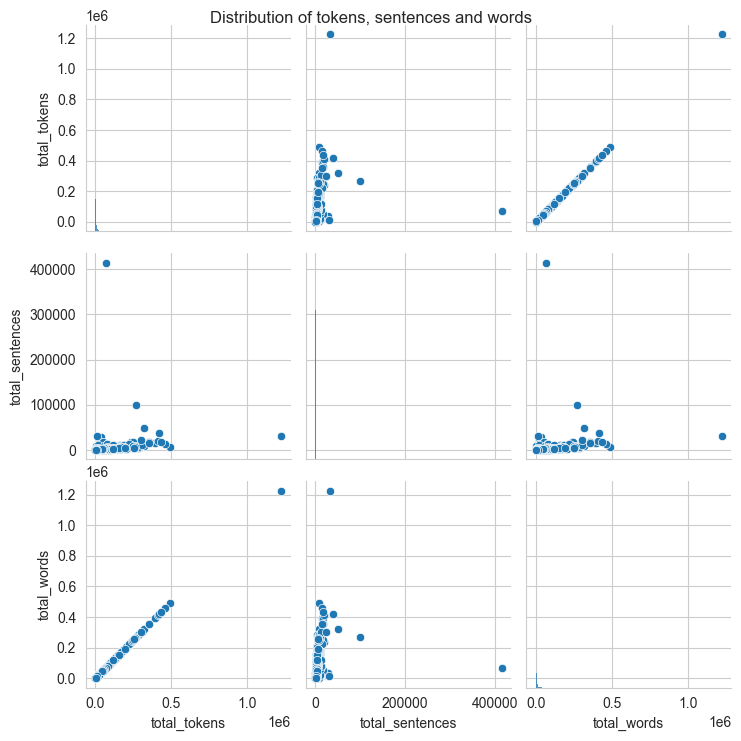

In [17]:
# Plot the distribution of tokens, sentences and words with a pairplot using seaborn. Use pallette as blues with appropriate labels and title and size 10x10

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8.125))
sns.pairplot(df[['total_tokens', 'total_sentences', 'total_words']])
plt.suptitle('Distribution of tokens, sentences and words')
plt.show()

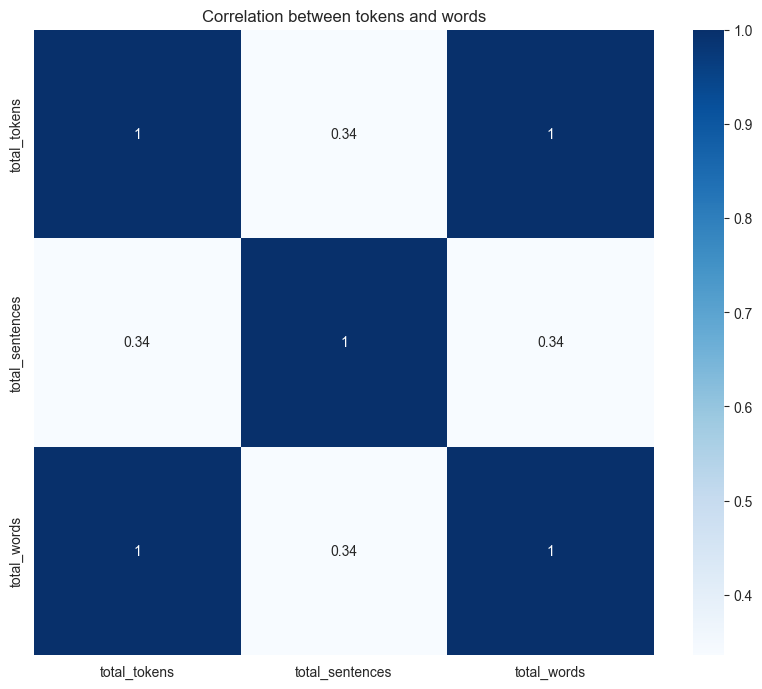

In [18]:
# Heatmap of correlation between tokens and words, label it properly and use pallette as blues, define plot size as 15x15

plt.figure(figsize=(10, 8.125))
plt.title('Correlation between tokens and words')
sns.heatmap(df[['total_tokens', 'total_sentences', 'total_words']].corr(), annot=True, cmap='Blues')
plt.show()